In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings #does not show any warning
warnings.filterwarnings('ignore')

In [2]:
#load file with cleaned data from prev lessons using read_csv
data = pd.read_csv('merged_clean_health.txt')

In [3]:
data.head(10)
data['state'].unique()

array(['FL', 'IL', 'NC', 'TX', 'CA', 'NV', 'Cali', 'AP', 'MI', 'OK', 'AR',
       'IN', 'MT', 'WI', 'MO', 'HI', 'UT', 'GA', 'WA', 'ID', 'CT', 'AL',
       'ND', 'SC', 'IA', 'CO', 'LA', 'OR', 'SD', 'TN', 'NM', 'AZ', 'MN',
       'KY', 'NJ', 'NE', 'KS', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee', 'MD', 'AK', 'VA', 'AE', 'AA', 'PA', 'VT', 'WV', 'GU'],
      dtype=object)

### Descriptive Statistics- basics

In [4]:
data.describe()
#data.describe(include=[np.number])

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


In [5]:
data.describe(include=[np.number])

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


In [6]:
#make a statistics summary df with transpose #create a new df with summary stat
summary = data.describe().T
#calculate the interquartile range as a new column # like boxplot
summary['iqr'] = summary['75%']-summary['25%']
summary

,count,mean,std,min,25%,50%,75%,max,iqr
id,3993.0,98929.308039,58179.839090,12.00000,46153.0000,101432.0,151653.000000,191779.0,105500.000000
median_home_val,3993.0,1158.437751,1033.485773,0.00000,548.0000,803.0,1349.000000,5982.0,801.000000
median_household_income,3993.0,351.622840,168.488445,0.00000,239.0000,318.0,425.000000,1500.0,186.000000
ic2,3993.0,400.713248,180.568500,0.00000,284.0000,366.0,478.000000,1500.0,194.000000
ic3,3993.0,399.876283,164.822741,0.00000,287.0000,365.0,480.000000,1311.0,193.000000
ic4,3993.0,444.732031,175.004178,0.00000,325.0000,410.0,528.000000,1331.0,203.000000
ic5,3993.0,16456.413724,9455.318118,0.00000,11136.0000,14356.0,18780.000000,174523.0,7644.000000
avggift,3993.0,11.785117,10.172672,2.26087,7.1875,10.0,14.428571,450.0,7.241071
target_d,3993.0,15.665036,12.703041,1.00000,10.0000,14.0,20.000000,200.0,10.000000


### Exploratory data analysis using matplotlib

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #all the plots will stack to thge notebook

UsageError: unrecognized arguments: #all the plots will stack to thge notebook


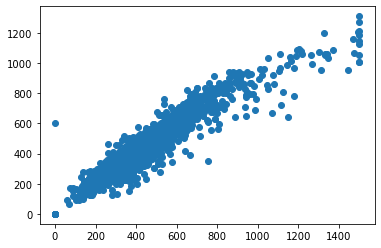

In [8]:
plt.scatter(x=data['ic2'], y=data['ic3'])
plt.show()

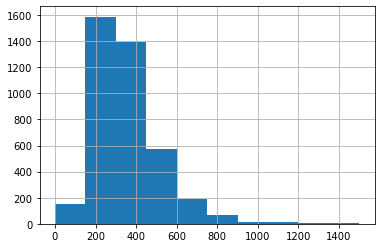

In [9]:
data['median_household_income'].hist()
plt.show()

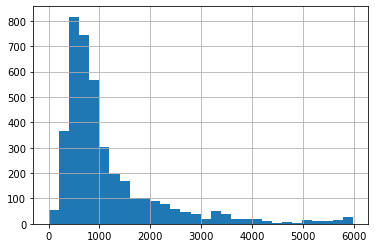

In [10]:
data['median_home_val'].hist(bins=30)
plt.show()

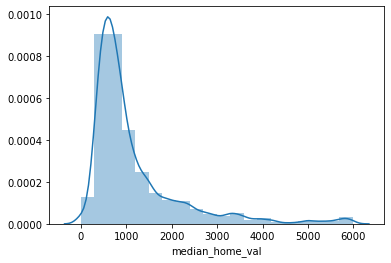

In [11]:
sns.distplot(data['median_home_val'], bins=20)
plt.show()

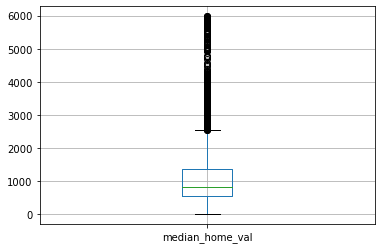

In [12]:
data[['median_home_val']].boxplot()
plt.show()

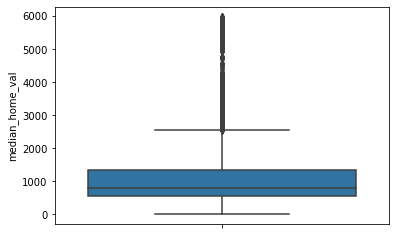

In [13]:
sns.boxplot(y="median_home_val", data=data)
plt.show()

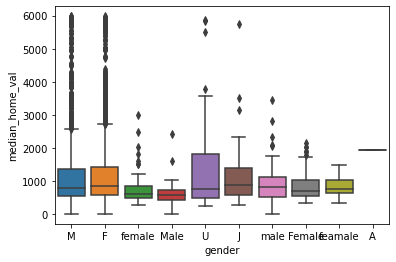

In [14]:
sns.boxplot(x = 'gender',y='median_home_val', data=data)
plt.show()

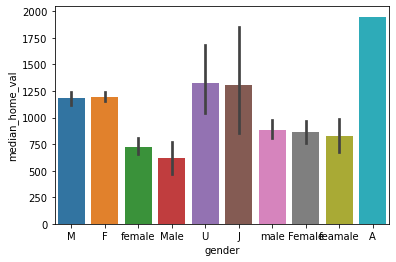

In [15]:
sns.barplot(x="gender", y="median_home_val", data=data)
plt.show()

### Correlation

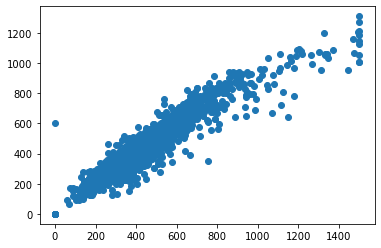

In [16]:
#review correlation of two selected variables 
plt.scatter(x=data['ic2'], y=data['ic3'])
plt.show()

In [17]:
#bring in the scipy library - The scientific python library
# an open-source Python library which is used to solve scientific and mathematical problems. 
# It is built on the NumPy extension and allows the user to manipulate and visualize data.
import scipy.stats as stats

In [18]:
x=data['ic2']
y=data['ic3']
stats.pearsonr(x, y) # gives correlation coefficient and the p value 

(0.9535853403294168, 0.0)

In [19]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9510617375454639, pvalue=0.0)

In [20]:
stats.kendalltau(x, y)

KendalltauResult(correlation=0.8254641303546064, pvalue=0.0)

In [21]:
#create a correlation matrix of numerical columns 

corr_data = data.drop(['id','state', 'gender'], axis=1)
correlations_matrix = corr_data.corr()
correlations_matrix

,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
median_home_val,1.000000,0.707209,0.743318,0.734526,0.748761,0.745223,0.138966,0.116805
median_household_income,0.707209,1.000000,0.951409,0.974777,0.928980,0.805221,0.120445,0.113246
ic2,0.743318,0.951409,1.000000,0.953585,0.971498,0.874783,0.136096,0.129964
ic3,0.734526,0.974777,0.953585,1.000000,0.971909,0.827514,0.125438,0.121965
ic4,0.748761,0.928980,0.971498,0.971909,1.000000,0.868411,0.132438,0.131260
ic5,0.745223,0.805221,0.874783,0.827514,0.868411,1.000000,0.141580,0.137878
avggift,0.138966,0.120445,0.136096,0.125438,0.132438,0.141580,1.000000,0.487595
target_d,0.116805,0.113246,0.129964,0.121965,0.131260,0.137878,0.487595,1.000000


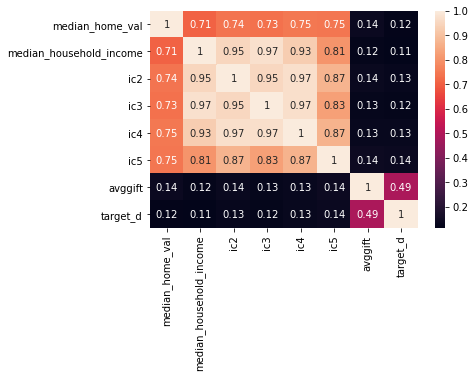

In [22]:
#create a heatmap 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

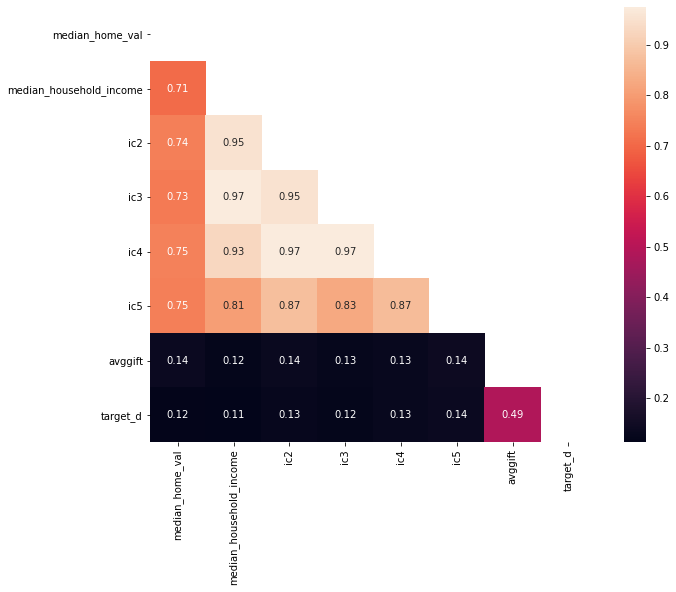

In [23]:
#use the mask technique to make it easier to read 
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()